## ANLY590 Homework2

**Shaoyu Feng**  
**sf865**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

### Problem1: Feedforward: Building a ReLU neural net- work

#### Question1

In [2]:
! pip install nnv

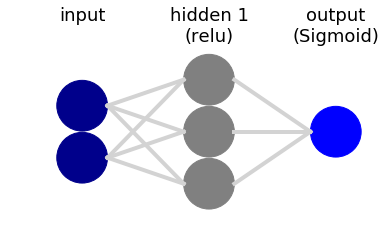

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1137ac278>)

In [3]:
from nnv import NNV
layersList = [
    {"title":"input\n", "units": 2, "color": "darkBlue"},
    {"title":"hidden 1\n(relu)", "units": 3},
    {"title":"output\n(Sigmoid)", "units": 1,"color": "Blue"},
]
NNV(layersList).render()

## Bias terms are not shown in the graph

![title](hand.jpg)

#### Question2

let $a_i$, i=1,2 3 be the linear comnibation of input for the hidden layer and $h_i$ i=1,2,3 be the activation functions. And for the last layer, let $\sigma(.)$ be the sigmoid function such that: 
$$ a_i=w_{1i}x_1+{w2i}x_2+b_i$$
$$h_i=Relu(a_i)=max(0,a_i)$$
$$a_f=v_1*h_1+v_2*h_2+v_3*h_3+c$$
$$y=\sigma(a_f) \text{, where }\sigma(x)=\frac{1}{1+e^{-x}}$$

#### Question3

In [4]:
def loss(y, y_hat):
    # Binary cross entropy
    tot = y * np.log(y_hat)+(1-y)*np.log(1-y_hat)
    return -tot.sum()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

In [5]:
def ff_nn_ReLu(x, params):
    W1,b1,W2,b2 = params
    h=relu(np.dot(x,W1)+b1)
    a_f=np.dot(h,w2)+b2
    y=sigmoid(a_f)
    return y

#### Question4

In [6]:
w1 = np.array([[1, -1, 0],[0,0,.5]]).reshape(2,3)
b1 = np.array([0,0,1]).reshape(1,3)
w2= np.array([1,0,-1]).reshape(3,1)
b2=1
x = np.array([[1,-1],[0,-1],[0,1]]).reshape((3,2))

In [7]:
ff_nn_ReLu(x, (w1,b1,w2,b2) )

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

### Problem2 :Gradient Descent
#### Question1

$$\frac {df(x,y)}{dx}= -3x^2-200(y^2-x)$$
$$\frac {df(x,y)}{dy}= 400y(y^2-x)$$

#### Question2


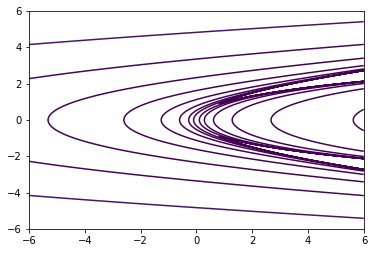

In [308]:
x = np.arange(-6, 6, 0.01)
y = np.arange(-6, 6, 0.01)
X, Y = np.meshgrid(x, y)
Z = (1-X**3)+ 100*(Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(start=-6,stop=6, num=20))

#### Question3

In [309]:
def grad_f(_in):
    x, y = _in
    df_dx = -3*x**2-200*(y**2-x)
    df_dy = 400*y*(y**2-x)
    return np.array([df_dx, df_dy])

In [310]:
def grad_descent(start=None, ite=10, lr=1):
    if start:
        point = start
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    for i in range(ite):
        grad = grad_f(point)
        point = point - (lr * grad)
        trajectory.append(point)
    return np.array(trajectory)

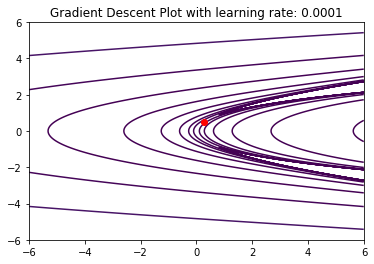

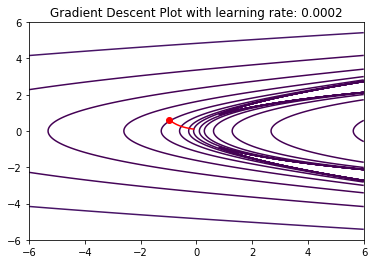

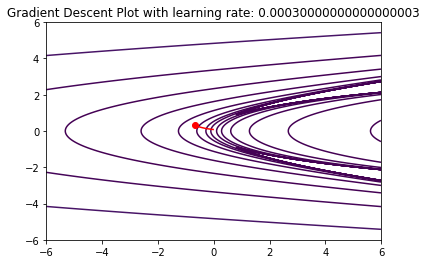

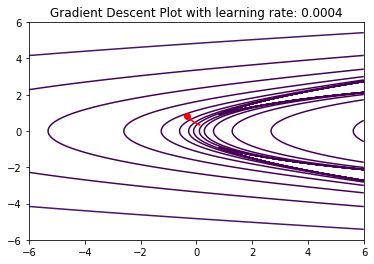

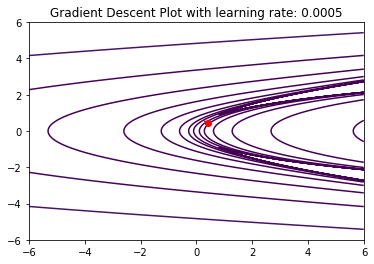

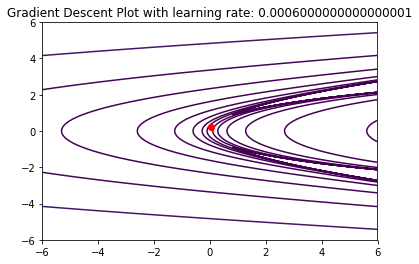

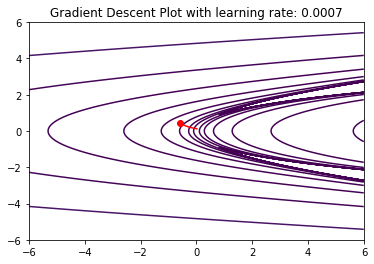

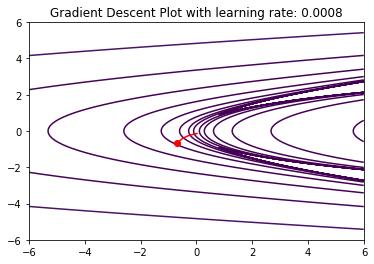

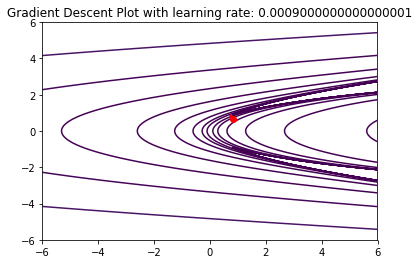

In [311]:
for i in range(1,10):
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, levels=np.logspace(start=-6,stop=6, num=20))
    lr=i*1e-4
    traj = grad_descent(ite=50, lr=lr)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-',color='red')
    plt.plot(x[0],y[0],'ro')
    plt.title('Gradient Descent Plot with learning rate: '+ str(lr))

#### Question4

In [312]:
def grad_descent_with_momentum(start=None, ite=10, lr=1,alpha=0.001):
    if start:
        point = start
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    prev=0
    for i in range(ite):
        grad = grad_f(point)
        point = point - (lr * grad)-alpha*prev
        prev=grad
        trajectory.append(point)
    return np.array(trajectory)

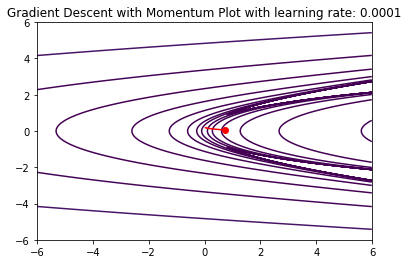

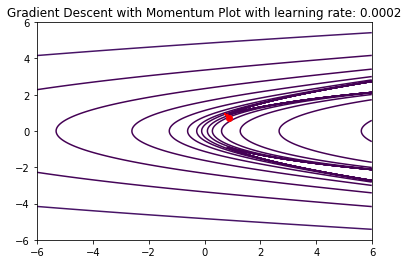

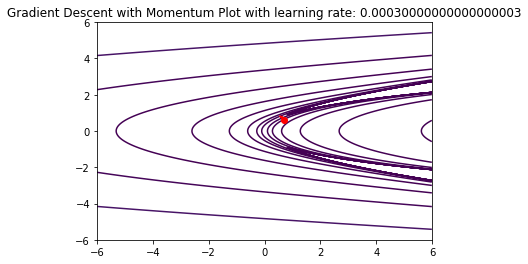

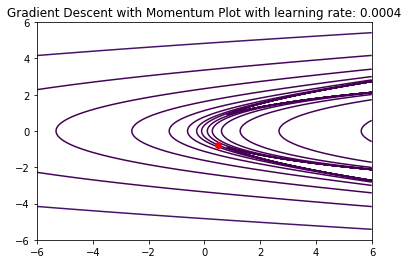

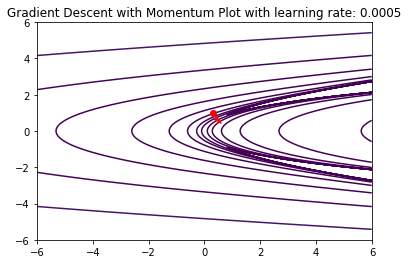

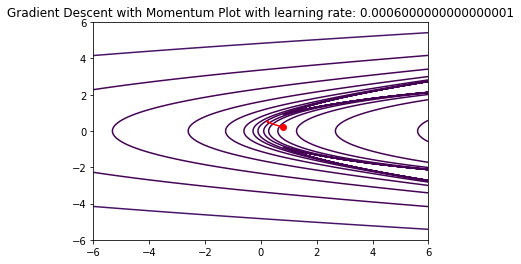

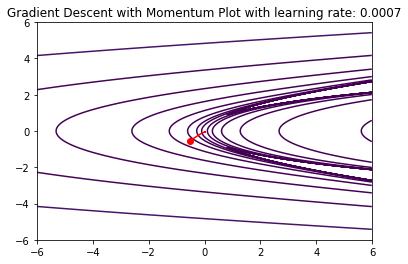

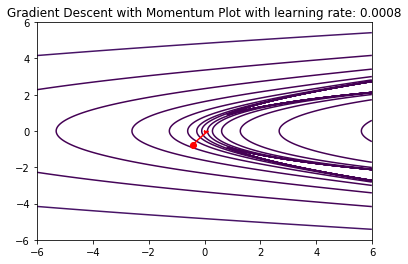

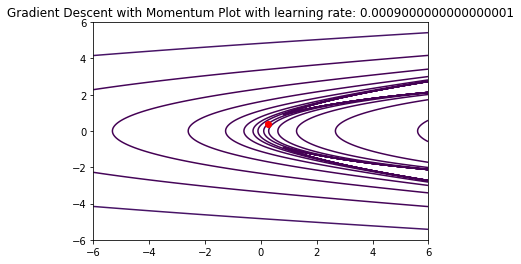

In [315]:
for i in range(1,10):
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, levels=np.logspace(start=-6,stop=6, num=20))
    lr=i*1e-4
    traj = grad_descent_with_momentum(ite=50, lr=lr)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-',color='red')
    plt.plot(x[0],y[0],'ro')
    plt.title('Gradient Descent with Momentum Plot with learning rate: '+ str(lr))

### Problem3 :Backprop
#### Question1  

There are generally 4 sets of variables, namely c, v, w anc b.
Gradient with respect to c is that 
$$ \frac{dLoss}{dc}= \frac{dLoss}{d\hat{y}}*\frac{\hat{y}}{a_f}*\frac{da_f}{dc}=\frac{y-\hat{y}}{\hat{y}*(1-\hat{y})}\hat{y}*(1-\hat{y})*1$$
Gradient with respect to v is that 
$$ \frac{dLoss}{dv_i}= \frac{dLoss}{d\hat{y}}*\frac{\hat{y}}{a_f}*\frac{da_f}{dv_i}=\frac{y-\hat{y}}{\hat{y}*(1-\hat{y})}\hat{y}*(1-\hat{y})*h_i \text { where i=1,2,3}$$
Gradient with respect to b is that  
$$ \frac{dLoss}{db_i}=\frac{dLoss}{d\hat{y}}*\frac{\hat{y}}{a_f}*\frac{da_f}{dh_i}*\frac{dh_i}{da_i}*\frac{da_i}{db_i}=\frac{y-\hat{y}}{\hat{y}*(1-\hat{y})}\hat{y}*(1-\hat{y})*v_i*I(a_i>0)*1$$
Gradient with respect to w is that
$$ \frac{dLoss}{dw_{ij}}=\frac{dLoss}{d\hat{y}}*\frac{\hat{y}}{a_f}*\frac{da_f}{dh_i}*\frac{dh_i}{da_i}*\frac{da_i}{dw_{ij}}=\frac{y-\hat{y}}{\hat{y}*(1-\hat{y})}\hat{y}*(1-\hat{y})*v_i*I(a_i>0)*x_i$$


#### Question2  

In [355]:
def grad_f(x,y,params):
    W1, b1, W2, b2 = params
    a_1=x.dot(W1)+b1
    h=relu(a_1)
    a_f=h.dot(W2)+b2
    y_hat=sigmoid(a_f)
    
    d_b2=(y_hat-y).sum()
    d_w2=h.T.dot(y_hat-y)
    
    d_b1=((y_hat-y).dot(W2.T)*relu_derivative(a_1)).sum(axis=0)
    d_w1=x.T.dot((y_hat-y).dot(W2.T)*relu_derivative(a_1))
    return (d_w1, d_b1, d_w2, d_b2)

def initialize_params():
    w1 = np.random.randn(6).reshape(2,3)
    w2 = np.random.randn(3).reshape(3,1)
    b1 = np.random.randn(3).reshape(1,3)
    b2 = np.random.randn(1)
    return (w1, b1, w2, b2)

In [356]:
x = np.random.randn(1200).reshape((600,2))
y= np.random.randn(600).reshape((600,1))
grad_f(x,y,initialize_params())

(array([[-300.15188825,  -66.38574894,   43.79498275],
        [-211.81870752,    3.83922288,  -17.25762573]]),
 array([436.31539852, -86.82671944, -73.9515733 ]),
 array([[514.1233322 ],
        [171.97058428],
        [357.03637143]]),
 343.4710334031307)

#### Question3

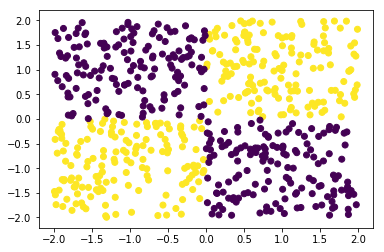

In [357]:
import random
size=150
x1,y_1= [random.uniform(0,2) for i in range(size)],[random.uniform(0,2) for i in range(size)]
l1= [1]*size
df1=pd.DataFrame(np.array([x1,y_1,l1]).T)
x2,y_2= [random.uniform(-2,0) for i in range(size) ],[random.uniform(-2,0) for i in range(size) ]
l2=[1]*size
df2=pd.DataFrame(np.array([x2,y_2,l2]).T)
x3,y_3= [random.uniform(0,2)  for i in range(size) ],[random.uniform(-2,0)  for i in range(size) ]
l3= [0]*size
df3=pd.DataFrame(np.array([x3,y_3,l3]).T)
x4,y_4= [random.uniform(-2,0) for i in range(size) ],[random.uniform(0,2) for i in range(size) ]
l4=[0]*size
df4=pd.DataFrame(np.array([x4,y_4,l4]).T)
df=df1.append(df2).append(df3).append(df4)
df.columns=['x','y','z']
df['z']=df['z'].astype(int)
fig, ax = plt.subplots()
ax.scatter(df['x'], df['y'], c=df['z'])
plt.show()

#### Question4

In [360]:
def relu_derivative(x):
    return np.where(x>0, 1, 0)

def grad_descent(x, y, starting_point, iterations=10, learning_rate=1e-2):
    point = starting_point 
    trajectory = [point]
    losses = [loss(y, ff_nn_ReLu(x, point))]
    for i in range(iterations):      
        grads = grad_f(x,y,point)
        update = []
        for (matrix, grad) in zip(point, grads):
            update.append(matrix - learning_rate*grad)
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss(y, ff_nn_ReLu(x, point)))
    return (np.array(trajectory), losses)

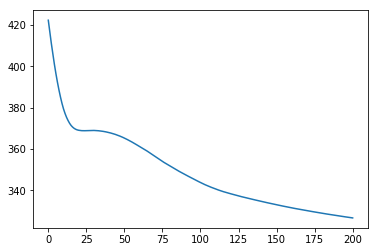

In [361]:
x=df.values[:,:-1]
y=df.values[:,-1].reshape((size*4,1))
p_0 = initialize_params()
traj, losses = grad_descent(x, y, starting_point=p_0, iterations=200,learning_rate=1e-4)
plt.plot(losses)

#### Question 5

In [362]:
def grad_descent_with_momentum(x, y, starting_point, iterations=10, learning_rate=1e-2,alpha=0.01):
    point = starting_point 
    trajectory = [point]
    losses = [loss(y, ff_nn_ReLu(x, point))]
    prev=None
    for i in range(iterations):
        from sklearn.utils import shuffle
        x, y = shuffle(x, y)       
        grads = grad_f(x,y,point)
        update = []
        if not prev:
            for (matrix, grad) in zip(point, grads):
                update.append(matrix - learning_rate*grad)
        else:
            for (matrix, grad,prevs) in zip(point, grads,prev):
                update.append(matrix - learning_rate*grad-alpha*prevs)
        prev=grads
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss(y, ff_nn_ReLu(x, point)))
    return (np.array(trajectory), losses)

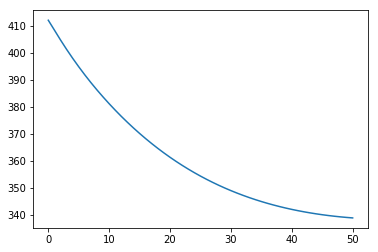

In [387]:
x=df.values[:,:-1]
y=df.values[:,-1].reshape((size*4,1))
p_0 = initialize_params()
traj, losses = grad_descent_with_momentum(x, y, starting_point=p_0, iterations=50,learning_rate=2e-4,alpha=0.00001)
plt.plot(losses)

Based on the above, we can see that the convergence rate is faster in the gradient with momentum. 

#### Question 6

In [388]:
y_pred=ff_nn_ReLu(x, traj[-1])
y_pred[y_pred >=0.5] = 1
y_pred[y_pred < 0.5] = 0

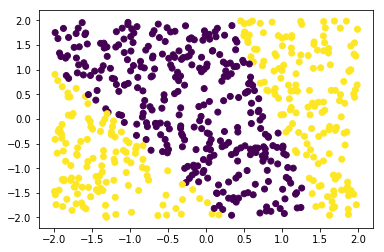

In [389]:
plt.scatter(x[:,0],x[:,1],c=y_pred.reshape(600))

In [415]:
def plot_decision_boundary(y_pred, X, y,params):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    _in=np.array([xx.ravel(), yy.ravel()]).T
    Z=ff_nn_ReLu(_in,params)
    Z=Z>0.5
    Z=Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=np.squeeze(y))

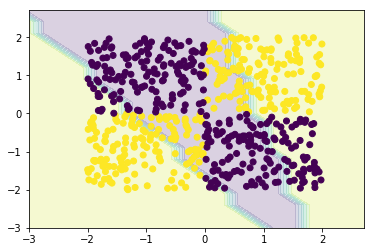

In [416]:
x=df.values[:,:-1]
y=df.values[:,-1].reshape((size*4,1))
plot_decision_boundary(y_pred, x, y,traj[-1])